## Two hidden layer neural network

In [1]:
import pandas as pd
import numpy as np
from random import seed
from random import random
from math import exp
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [27]:
class layer:
    
    '''
    This class represents a full connected layer which makes our ANN
    Each layer will have its weights and bias

    '''
    def __init__(self,NumberOfNeurons, dimension_1, dimension_2):
        range_value = np.sqrt(2/dimension_2)
        #self.weight = np.random.uniform(-range_value,range_value,(dimension_2,dimension_1))
        self.weight = np.random.randn(dimension_2, dimension_1) * np.sqrt(1/dimension_1)
        self.bias = np.random.uniform(-range_value,range_value,(dimension_2, 1))
        self.weight_gradient = None
        self.bias_gradient = None

In [28]:
class NeuralNet:
    
    def __init__(self):
        
        self.layers = []
        self.layers.append(layer(2,2,5))
        self.layers.append(layer(5,5, 5))
        self.layers.append(layer(5, 5, 1))
        
    # Transfer neuron activation
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    # Calculate the derivative of an neuron output
    def sigmoid_derivative(self, output):
        return output * (1.0 - output)
    
    def loss_derivative(self, preds, labels):
        derivative = -(np.divide(labels,preds) - np.divide((1-labels),(1-preds)))
        return derivative
        
    def forward_pass(self, data):
        
        cache = []
        
        a_2 = self.sigmoid(np.dot(self.layers[0].weight, data) + self.layers[0].bias)
        a_3 = self.sigmoid(np.dot(self.layers[1].weight, a_2) + self.layers[1].bias)
        a_4 = self.sigmoid(np.dot(self.layers[2].weight, a_3) + self.layers[2].bias)   # a_4 is the final layer output which is a row vector
        
        cache.append(a_4)
        cache.append(a_3)
        cache.append(a_2)
        cache.append(data)
        return a_4, cache
    
    def calculate_loss(self, Y_hat, Y):
        # probs and labels must be row vectors
        
        #epsilon = 1e-12
        #Y_hat = np.clip(Y_hat, epsilon, 1.0 - epsilon)
        
#         loss = (labels * np.log(probs)) + ((1.0 - labels) * np.log(1.0 - probs))
#         loss = - np.mean(loss)   
        
        m =  Y_hat.shape[0]
        loss = -1/m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
        return loss
        
        
    def backward_pass(self, cache, preds, labels, X):
        batch_size = X.shape[0]
        
        error = loss_derivative(preds, labels)
        for layer in reversed(self.layers):
            delta = error * self.sigmoid_derivative(cache.pop(0))
            weight_gradient = np.dot(delta, cache[0].T) / batch_size
            bias_gradient =  np.sum(delta,axis=1,keepdims=True) / batch_size
            layer.weight_gradient = weight_gradient
            layer.bias_gradient = bias_gradient
    
    
    

In [241]:
# data = np.random.rand(2, 50)
# labels = np.random.randint(0, 2, 50)
# nn = NeuralNet()

In [258]:
train_data = pd.read_csv('DWH_Training.csv', names= ['Height', 'Weight', 'Label'])
test_data = pd.read_csv('DWH_test.csv',  names= ['Height', 'Weight', 'Label', 'Irrelevant'])

In [29]:
net = NeuralNet()

In [259]:
net = NeuralNet()
epochs = 2000
lr = 0.001
losses = []

data, labels = np.array(train_data[['Height', 'Weight']]), np.array(train_data['Label'])
labels = np.asarray(list(map(lambda x: 0 if x == -1 else 1.0, labels)))
scaler = StandardScaler().fit(data)
data = scaler.transform(data)
    
    
for epoch in range(epochs):
    data, labels = np.array(train_data[['Height', 'Weight']]), np.array(train_data['Label'])
    labels = np.asarray(list(map(lambda x: 0 if x == -1 else 1.0, labels)))
    scaler = StandardScaler().fit(data)
    data = scaler.transform(data)
    
    preds, cache = net.forward_pass(data)
    loss = net.calculate_loss(preds, labels)
    #print(preds)
    #print("Loss ", loss)
    losses.append(loss.item())
    gradients = net.backward_pass(cache, labels, data)
    
    for layer in net.layers:
        layer 
    net.layer_1.weight -= lr * gradients['dW2']
    net.layer_2.weight -= lr * gradients['dW3']
    net.layer_3.weight -= lr * gradients['dW4']

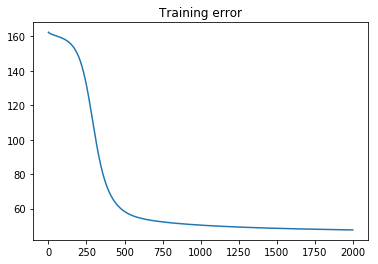

In [260]:
plt.plot(losses)
title = plt.title("Training error")

In [262]:
test_labels = np.array(test_data['Label'])
test_data = np.array(test_data[['Height', 'Weight']])
test_labels = np.asarray(list(map(lambda x: 0 if x == -1 else 1.0, test_labels)))

In [263]:
preds, _ = net.forward_pass(test_data)

In [264]:
preds

array([[0.00527187, 0.00527187, 0.00527187, 0.00527187, 0.00527187,
        0.00527187, 0.00527187, 0.00527187, 0.00527187, 0.00527187,
        0.00527187, 0.00527187, 0.00527187, 0.00527187, 0.00527187,
        0.00527187, 0.00527187, 0.00527187, 0.00527187, 0.00527187,
        0.00527187, 0.00527187, 0.00527187, 0.00527187, 0.00527187,
        0.00527187, 0.00527187, 0.00527187, 0.00527187, 0.00527187,
        0.00527187, 0.00527187, 0.00527187, 0.00527187, 0.00527187,
        0.00527187, 0.00527187, 0.00527187, 0.00527187, 0.00527187,
        0.00527187, 0.00527187, 0.00527187, 0.00527187, 0.00527187]])

In [32]:
for layer in net.layers:
    print(np.shape(layer.bias))


(5, 1)
(5, 1)
(1, 1)
